In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../final_data/analysis2c.csv')
df2 = pd.DataFrame(columns=['model', 'tracc', 'trfa', 'trdr', 'teacc', 'tefa', 'tedr', 'tteacc', 'ttefa', 'ttedr'])

In [3]:
recs = ['tracc', 'trfa', 'trdr', 'teacc', 'tefa', 'tedr', 'tteacc', 'ttefa', 'ttedr']
for i in range(38):
    st = i*10
    new_row = [df.iloc[st]['model']]
    for rec in recs:
        m = np.mean(df.iloc[st:st+10][rec].to_numpy())
        new_row.append(np.round(m,2))
    df2.loc[i] = new_row

In [4]:
save_root = '../final_data/analysis_plot2/'

### select valid

In [5]:
remov = []
keep = []
for i in range(38):
    tefa = df2.iloc[i]['tefa']
    tedr = df2.iloc[i]['tedr']
    if tedr < 0.1:
        remov.append(i)
    else:
        keep.append(i)

In [6]:
df2.iloc[remov]['model']

2           NbsFdnn
5           YbsFdnn
8           NbsHdnn
11          YbsHdnn
28    NcwtLSTMFlstm
29    YcwtLSTMFlstm
30    NcwtLSTMHlstm
31    YcwtLSTMHlstm
34        Nframednn
37        Yframednn
Name: model, dtype: object

In [7]:
# df3 = df2.iloc[keep]
df3 = df2
df3.reset_index(drop=True, inplace=True)

In [8]:
df3

,model,tracc,trfa,trdr,teacc,tefa,tedr,tteacc,ttefa,ttedr
0,NbsFsvm,0.99,0.00,0.99,0.81,0.13,0.68,0.59,0.26,0.24
1,NbsFrf,1.00,0.00,1.00,0.76,0.04,0.37,0.65,0.10,0.09
2,NbsFdnn,0.65,0.00,0.00,0.65,0.00,0.00,0.68,0.00,0.00
3,YbsFsvm,1.00,0.00,0.98,0.85,0.08,0.55,0.76,0.13,0.22
4,YbsFrf,1.00,0.00,1.00,0.85,0.01,0.24,0.81,0.02,0.03
5,YbsFdnn,0.79,0.00,0.00,0.79,0.00,0.00,0.81,0.00,0.00
6,NbsHsvm,1.00,0.00,0.99,0.75,0.16,0.59,0.57,0.28,0.24
7,NbsHrf,1.00,0.00,1.00,0.74,0.04,0.32,0.64,0.10,0.08
8,NbsHdnn,0.65,0.00,0.00,0.65,0.00,0.00,0.68,0.00,0.00
9,YbsHsvm,1.00,0.00,1.00,0.84,0.09,0.43,0.79,0.11,0.20


### Graph 1

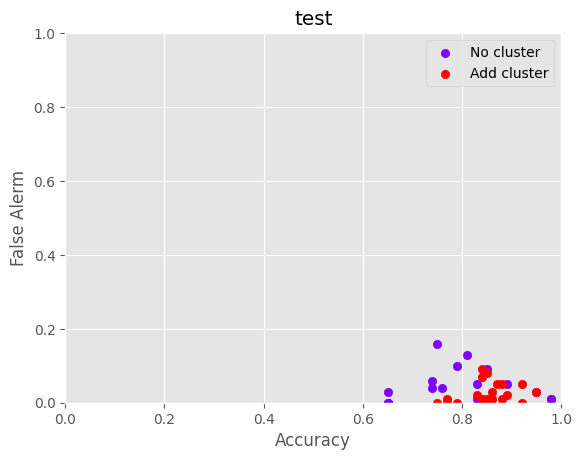

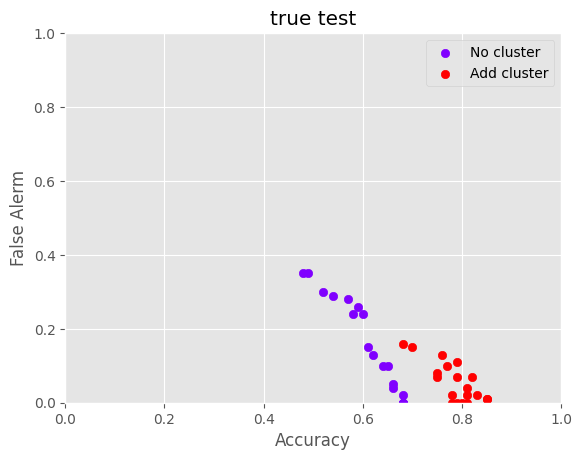

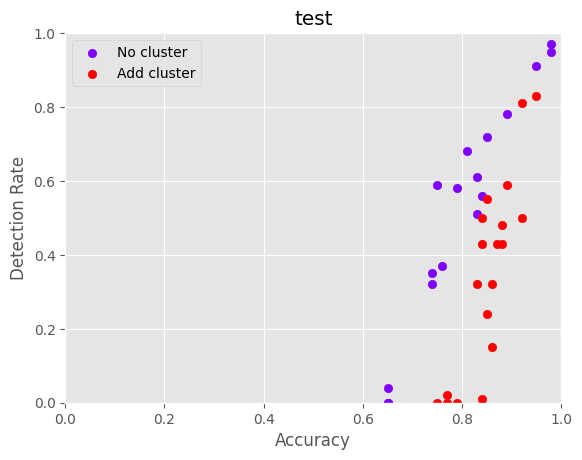

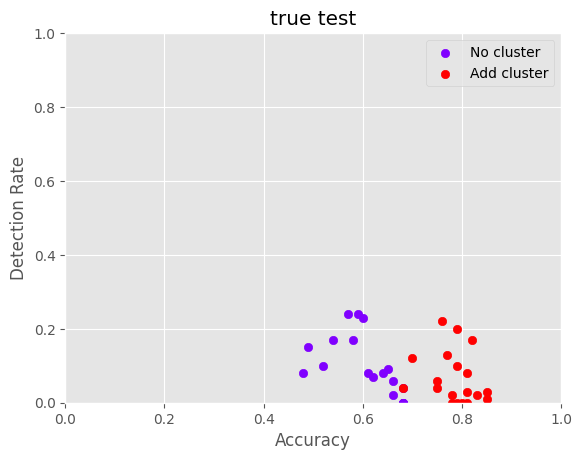

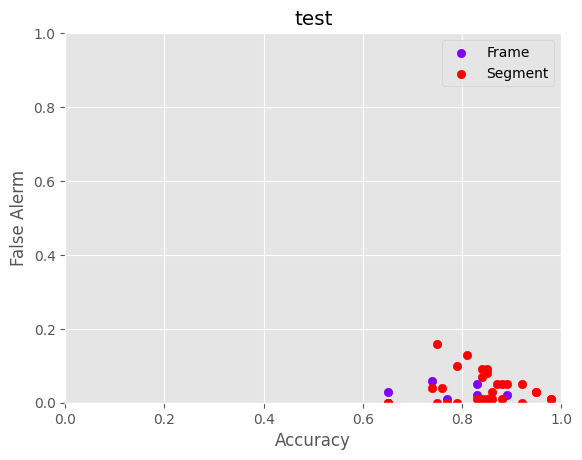

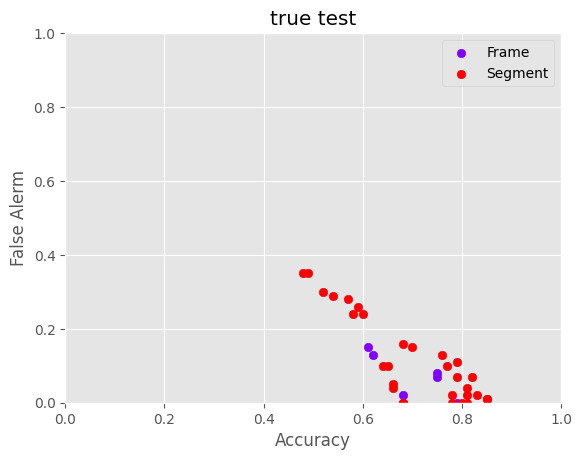

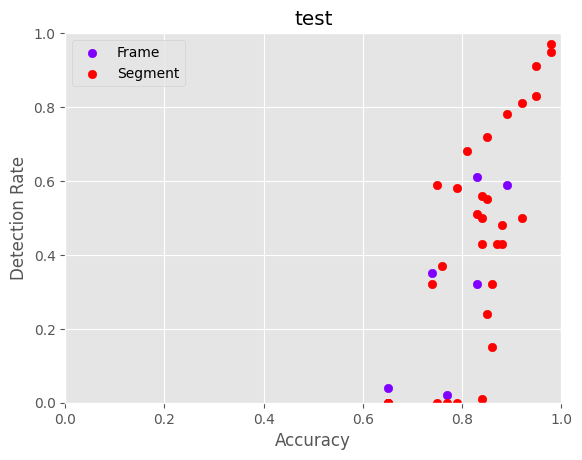

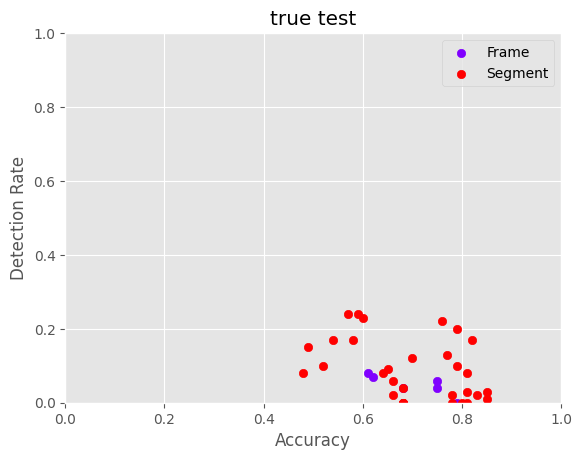

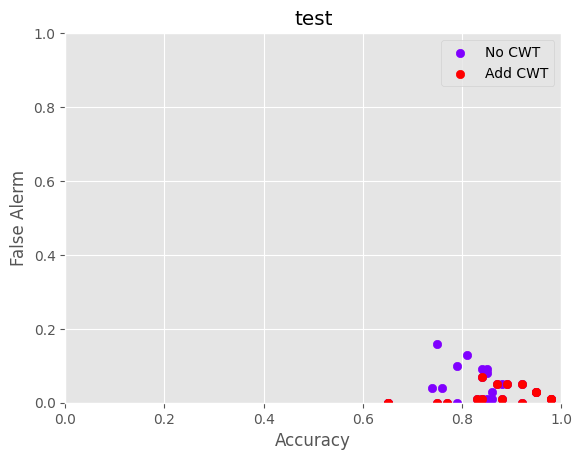

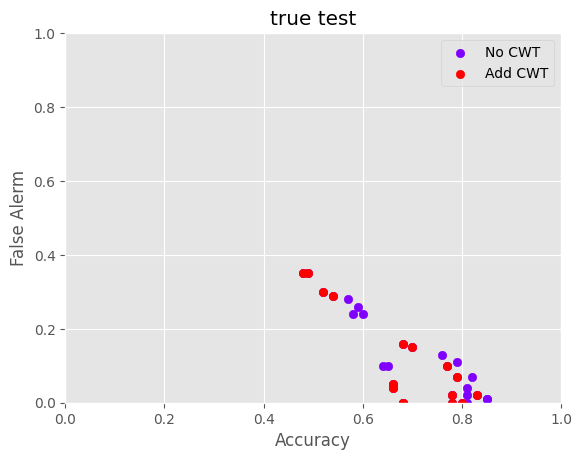

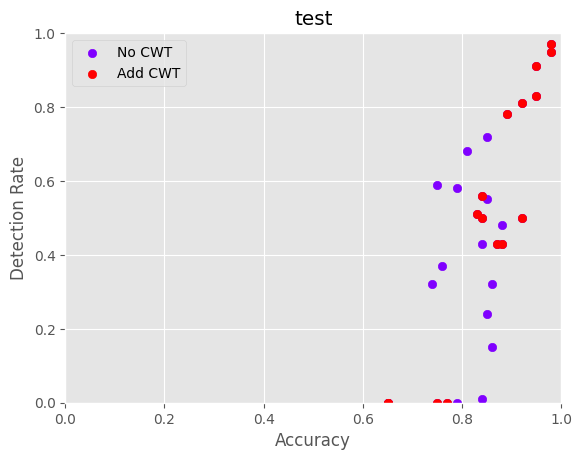

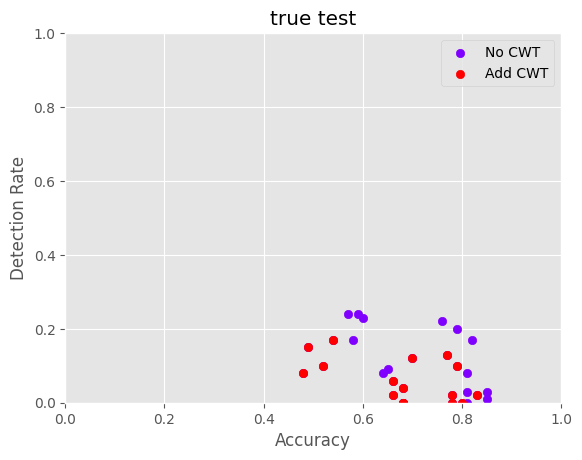

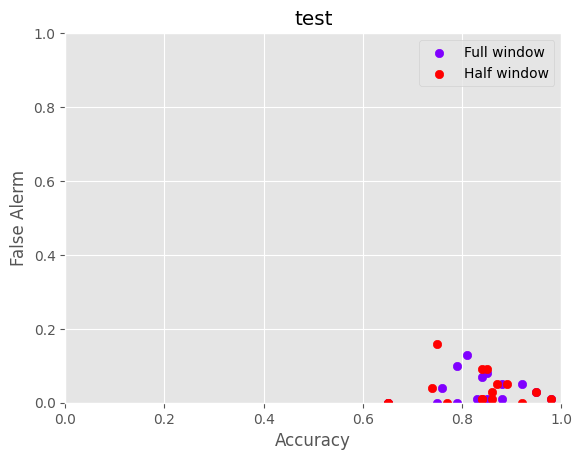

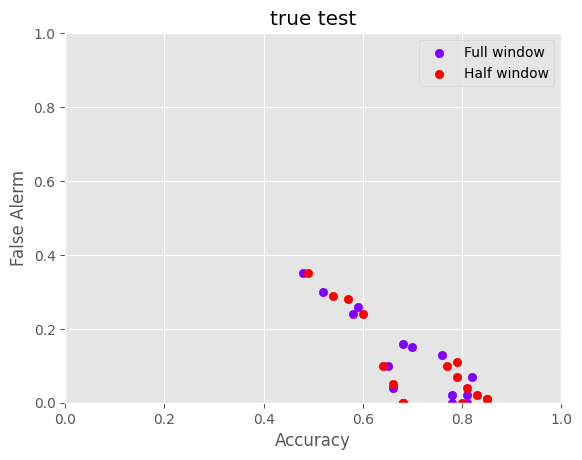

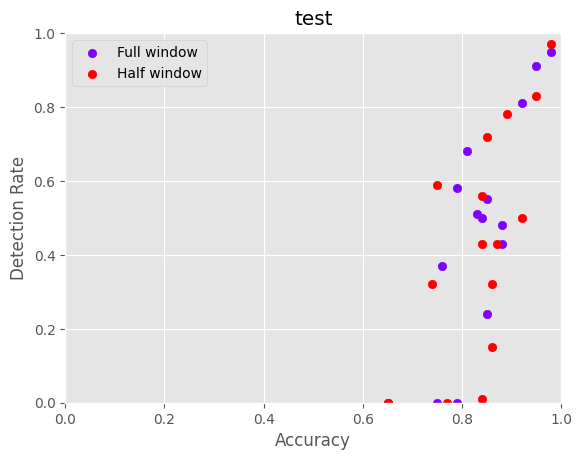

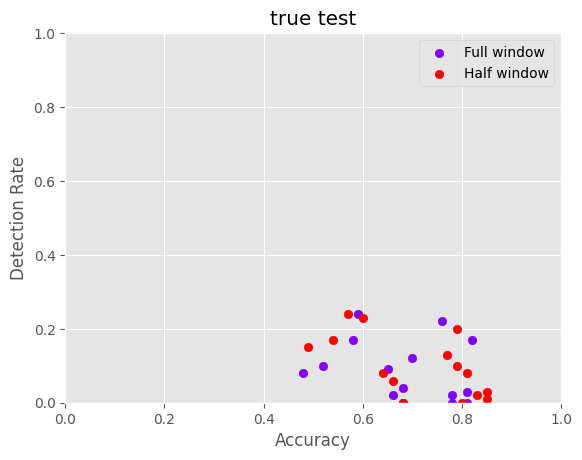

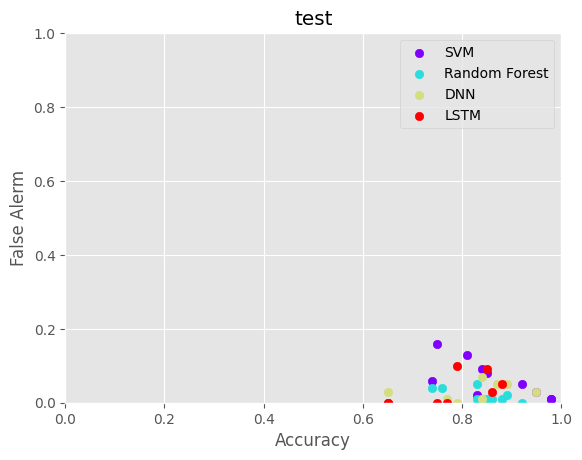

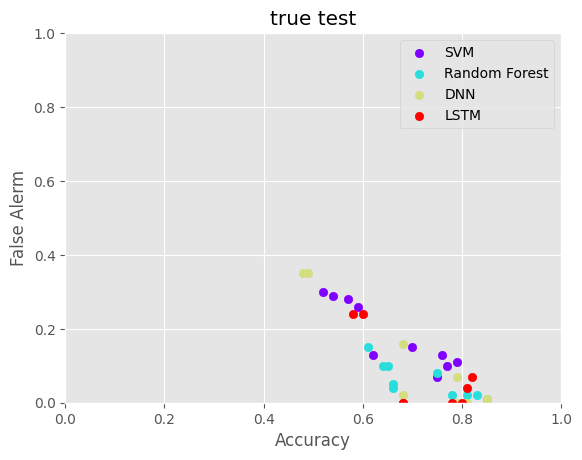

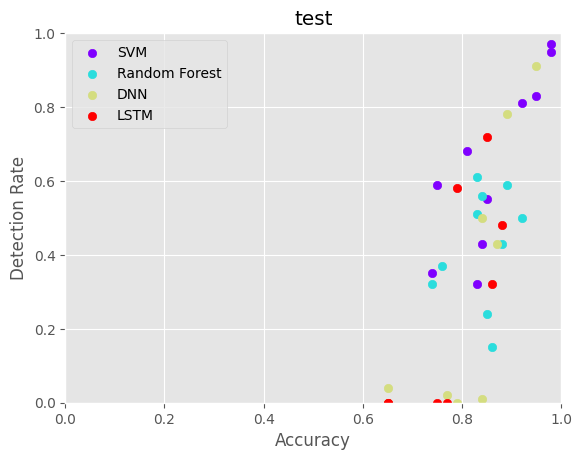

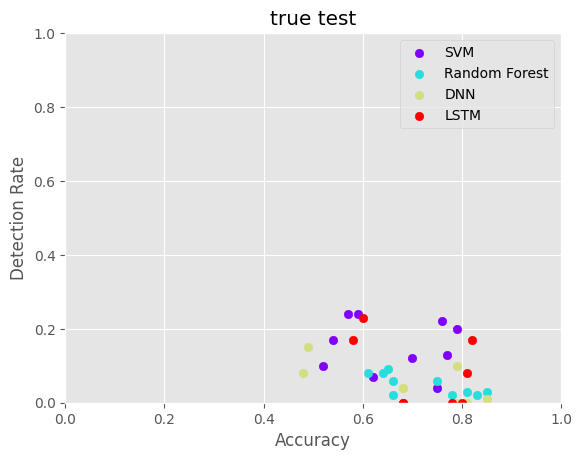

In [10]:
# compare
for compare in [0,1,2,3,4]:# 0 cluster, 1 frame/seg, 2 cwt, 3 window, 4 model
    # axis select
    for ax1, ax2 in [[0,1],[0,2]]:
        # axes
        axes = ['Accuracy', 'False Alerm', 'Detection Rate']
        axess = ['ACC','FA','DR']
        # subplots
        cols = [['tracc','trfa','trdr'],['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
        subtitles = ['train','test','true test']
        # select exp
        compares = {
            0:['N','Y'],
            1:['frame','bs'],
            2:['bs','cwt'],
            3:['F','H'],
            4:['svm', 'rf', 'dnn', 'lstm']
        }
        legends = {
            0:['No cluster', 'Add cluster'],
            1:['Frame', 'Segment'],
            2:['No CWT', 'Add CWT'],
            3:['Full window', 'Half window'],
            4:['SVM', 'Random Forest', 'DNN', 'LSTM']
        }
        cmp_titles = {
            0:'Clustser',
            1:'FrameOrSegment',
            2:'CWT',
            3:'Window',
            4:'Model'
        }

        
        colors = cm.rainbow(np.linspace(0, 1, len(compares[compare])))
        title = cmp_titles[compare]+'_Compare_'+axess[ax1]+'-'+axess[ax2]
        save_path = save_root+title+'/'
        if not os.path.isdir(save_path):
            os.makedirs(save_path)

        for i in range(1,3):
            ax = cols[i]
            plt.figure()
            for j, cmp in enumerate(compares[compare]):
                x = []
                y = []
                for k in range(len(df3.index)):
                    if df3.iloc[k]['model'].find(cmp)!=-1:
                        x.append(df3.iloc[k][ax[ax1]])
                        y.append(df3.iloc[k][ax[ax2]])
                plt.scatter(x,y, color=colors[j], label=legends[compare][j])
            plt.title(subtitles[i])
            plt.xlim(0,1)
            plt.xlabel(axes[ax1])
            plt.ylim(0,1)
            plt.ylabel(axes[ax2])
            plt.legend()
            plt.savefig(save_path+str(i+1)+'.png')

### Graph2 show all

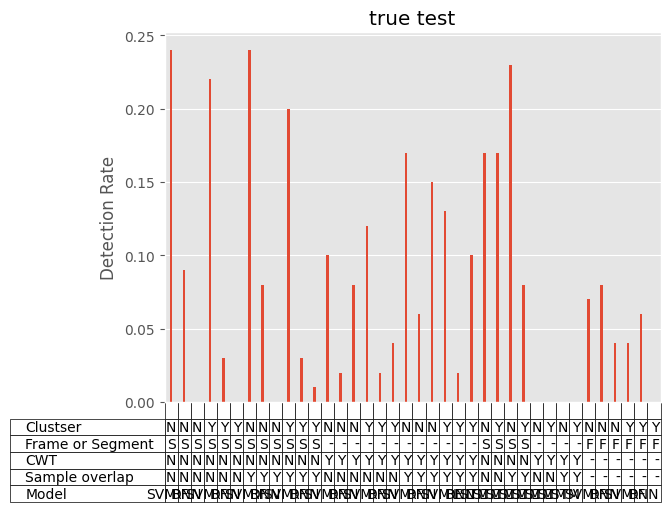

In [9]:
s = 2 #'train','test','true test'
s2 = 2 # acc, fa, dr

compares = [
    ['N','Y'],
    ['frame','bs'],
    ['bs','cwt'],
    ['F','H'],
    ['svm', 'rf', 'dnn', 'lstm']
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]
subtitles = ['train','test','true test']
cols = [['tracc','trfa','trdr'],['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
axes = ['Accuracy', 'False Alerm', 'Detection Rate']

col = cols[s]
y = df3.iloc[:][col[s2]]
cell = [[],[],[],[],[]]
cmps = []
for k in range(len(y)):
    for i in range(5):
        for j, cmp in enumerate(compares[i]):
            if df3.iloc[k]['model'].find(cmp)!=-1:
                cell[i].append(show_cmps[i][j])
                break
            if j==len(compares[i])-1:
                cell[i].append('-')
        
fig = plt.figure()
ax = fig.add_subplot(111)

ax.title.set_text(subtitles[s])
width = 0.2
x = np.arange(len(y)) + width/2
spare_width = (1 - width)/2

#plt.tick_params(axis='both', which='major', labelsize=35, pad=15)
#plt.tick_params(axis='y', which='minor', labelsize=35, pad=15)

bar1 = ax.bar(x, y, width)
plt.xticks([])
# plt.yticks(fontsize=15)
plt.ylabel(axes[s2])
plt.xlim(-spare_width,len(y)-spare_width)
# plot table
table = plt.table(cellText=cell,
                rowLabels=['Clustser','Frame or Segment','CWT','Sample overlap','Model'],
                colLabels=['']*len(y),
                loc='bottom')
table.scale(1,1)
table.auto_set_font_size(False)
table.set_fontsize(10)

### Graph2

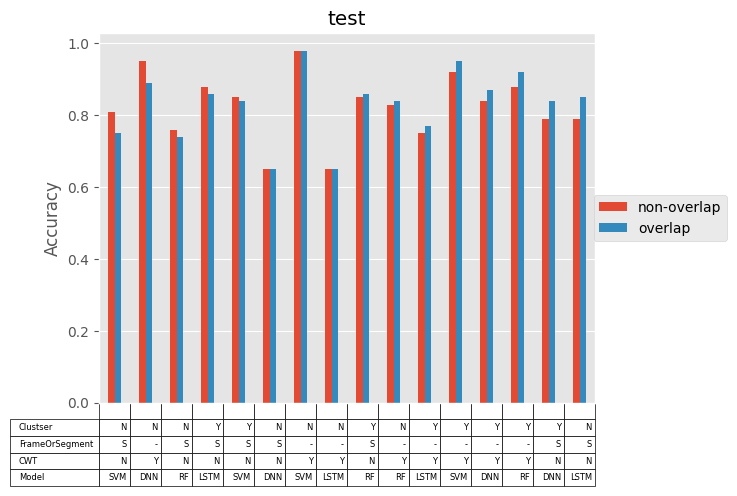

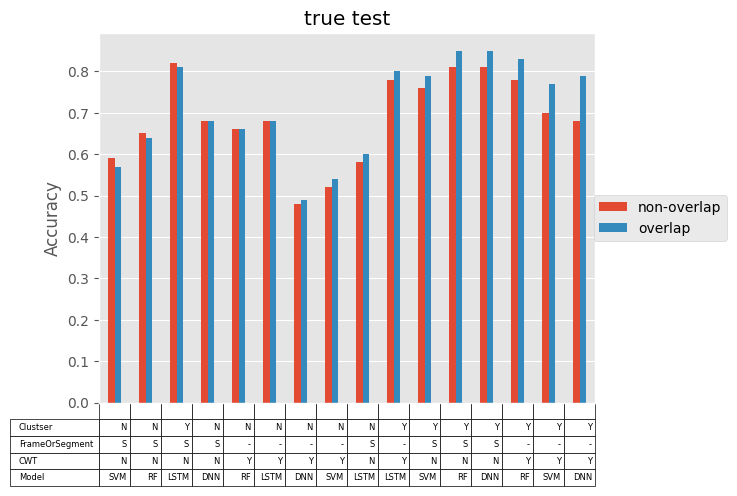

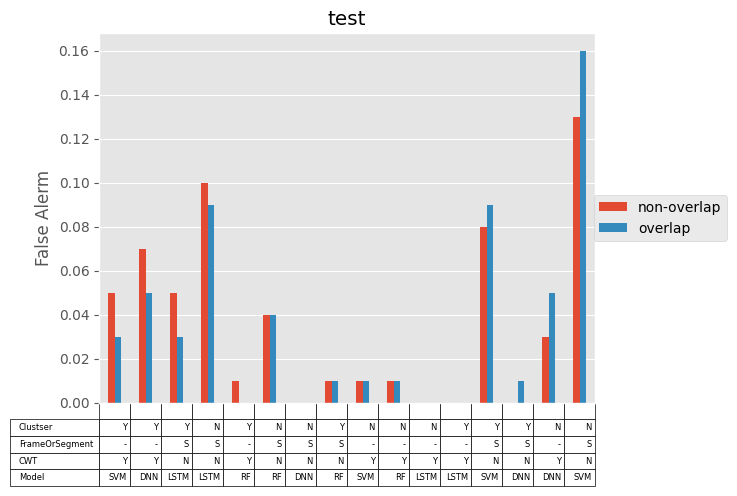

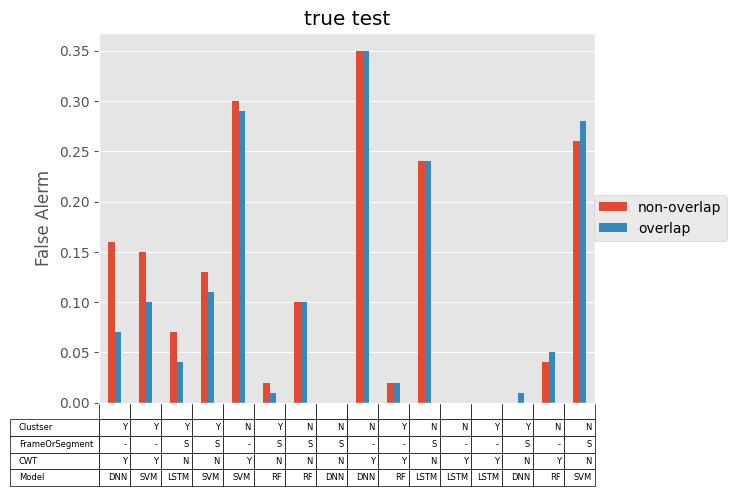

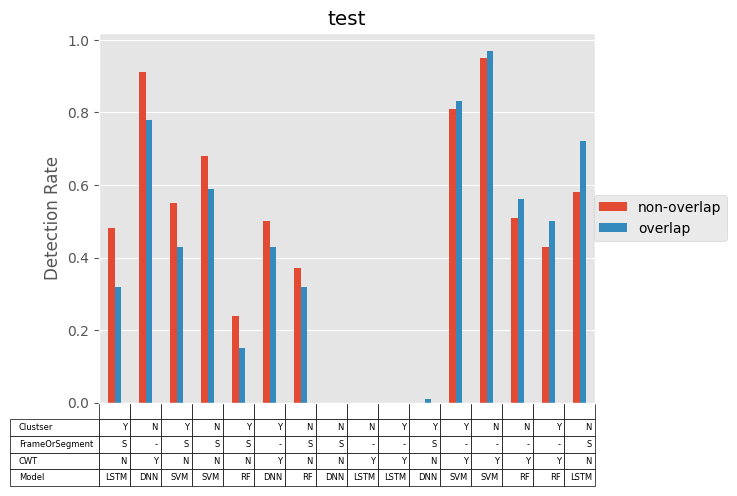

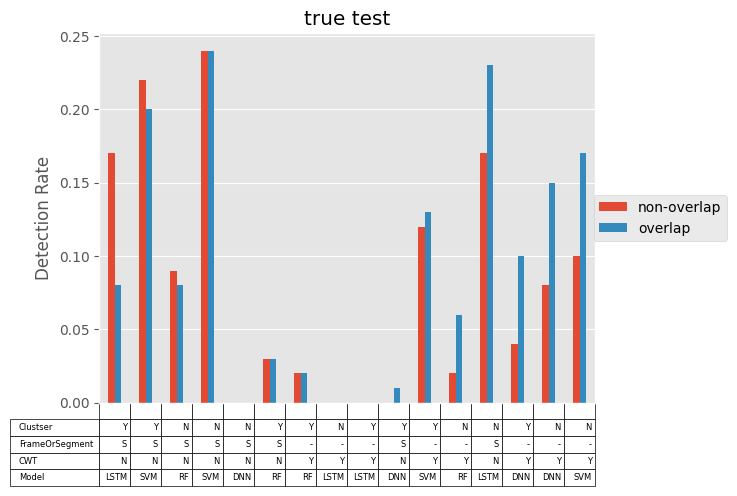

In [36]:
# compare
compare = 3 # 0 cluster, 2 cwt, 3 window
# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['tracc','trfa','trdr'],['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['train','test','true test']
# select exp
compares = [
    ['N','Y'],
    ['frame','bs'],
    ['bs','cwt'],
    ['F','H'],
    ['svm', 'rf', 'dnn', 'lstm']
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]
legends = [
    ['No cluster', 'Add cluster'],
    ['Frame', 'Segment'],
    ['No CWT', 'Add CWT'],
    ['non-overlap', 'overlap'],
    ['SVM', 'Random Forest', 'DNN', 'LSTM']
]
cmp_titles = [
    'Clustser',
    'FrameOrSegment',
    'CWT',
    'Sample overlap',
    'Model'
]
cmp = compares[compare]
title = 'BAR_'+cmp_titles[compare]+'_Compare'
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)
for s in range(3):
    for i in range(1,3):
        dt = cols[i]
        y = []
        names = []#
        for j, cmp in enumerate(compares[compare]):
            tmp = []
            tmp2 = []#
            for k in range(len(df3.index)):
                if df3.iloc[k]['model'].find(cmp)!=-1:
                    tmp.append(df3.iloc[k][dt[s]])
                    tmp2.append(df3.iloc[k]['model'])#
            y.append(tmp)
            names.append(tmp2)#
            #print(tmp2)
        cl = len(y)
        fig = plt.figure()
        ax = fig.add_subplot(111)

        cell = [[],[],[],[]]
        cmps = []
        x=names[0]
        for k in range(len(x)):
            skip=0
            for r in range(5):
                if r == compare:
                    skip=1
                    continue
                for j, cmp in enumerate(compares[r]):
                    if x[k].find(cmp)!=-1:
                        cell[r-skip].append(show_cmps[r][j])
                        break
                    if j==len(compares[r])-1:
                        cell[r-skip].append('-')
        row_labels = cmp_titles.copy()
        del row_labels[compare]
        
        # sort by max val
        y = np.array(y)
        cell = np.array(cell)
        idx = sorted(np.arange(len(y[0])), key = lambda s:(y[1]-y[0])[s])
        y = y[:,idx]
        cell = cell[:,idx]

        ax.title.set_text(subtitles[i])
        width = 0.1*cl
        x = np.arange(len(y[0]))
        spare_width = (1 - width)/cl

        for r in range(cl):
            ax.bar(x+r*width, y[r], width, label=legends[compare][r])
        ax.set_xlim(-spare_width,len(x)-spare_width)
        plt.xticks([])
        plt.ylabel(axes[s])
        plt.legend(loc='center right', bbox_to_anchor=(1.28, 0.5))
        
        # plot table
        table = plt.table(cellText=cell,
                rowLabels=row_labels,
                colLabels=['']*len(y[0]),
                loc='bottom')
        
        plt.savefig(save_path+axes[s]+'_'+str(i+1)+'.png', bbox_inches="tight")
        table.auto_set_font_size(False)
        table.set_fontsize(6)

### Graph2 for model

In [ ]:
# compare
compare = 4 # 0 cluster, 2 cwt, 3 window, 4 model
# axis select
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
# subplots
cols = [['acc'  ,'FA'  ,'DR'  ],['acc.1','FA.1','DR.1'],['acc.2','FA.2','DR.2'],
        ['acc.3','FA.3','DR.3'],['acc.4','FA.4','DR.4'],['acc.5','FA.5','DR.5']]
subtitles = ['train pH7.4','test pH7.4','true test pH7.4',
            'train Select 1','test Select 1','true test Select 1']
# select exp
compares = {
    0:['N','Y'],
    1:['F','S'],
    2:['N','Y'],
    3:['F','H'],
    4:['svm', 'RF', 'DNN', 'LSTM']
}
legends = {
    0:['No cluster', 'Add cluster'],
    1:['Frame', 'Segment'],
    2:['No CWT', 'Add CWT'],
    3:['Full window', 'Half window'],
    4:['SVM', 'Random Forest', 'DNN', 'LSTM']
}
cmp_titles = {
    0:'Clustser',
    1:'FrameOrSegment',
    2:'CWT',
    3:'Window',
    4:'Model'
}
cmp = compares[compare]
title = 'BAR_'+cmp_titles[compare]+'_Compare'
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

for i in range(6):
    ax = cols[i]
    for j, axi in enumerate(ax):
        plt.figure()
        a = df[df.iloc[:,compare]==cmp[0]][axi].to_numpy() 
        b = df[df.iloc[:,compare]==cmp[1]][axi].to_numpy() 
        c = df[df.iloc[:,compare]==cmp[2]][axi].to_numpy()
        d = np.concatenate([[0,0],df[df.iloc[:,compare]==cmp[3]][axi].to_numpy()])

        # no sort diff
        diff_idx = np.arange(len(a))

        # table under plot
        cell = []
        raw_labels = []
        for k in range(5):
            if k==compare:
                continue
            row = df[df.iloc[:,compare]==cmp[0]].iloc[:,k].to_numpy()
            cell.append(row[diff_idx])
            raw_labels.append(cmp_titles[k])

        # plot
        plt.title(subtitles[i])
        x = np.arange(len(diff_idx))
        width = 0.2
        plt.bar(x - 2*width, a[diff_idx], width, label=legends[compare][0])
        plt.bar(x - width, b[diff_idx], width, label=legends[compare][1])
        plt.bar(x , c[diff_idx], width, label=legends[compare][2])
        plt.bar(x + width, d[diff_idx], width, label=legends[compare][3])
        plt.xticks([])
        plt.ylabel(axes[j])
        # pos = plt.get_position()
        # plt.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
        plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
        
        # plot table
        if len(x)!=0:
            plt.table(cellText=cell,
                    rowLabels=raw_labels,
                    colLabels=['']*len(diff_idx),
                    loc='bottom')

            #save figure
            plt.savefig(save_path+axes[j]+'_'+str(i+1)+'.png', bbox_inches="tight")

### Graph2 for FOS

In [20]:
df3.iloc[nidx[0]]['model'].to_list()

['Nframesvm', 'Nframerf', 'Nframednn', 'Yframesvm', 'Yframerf', 'Yframednn']

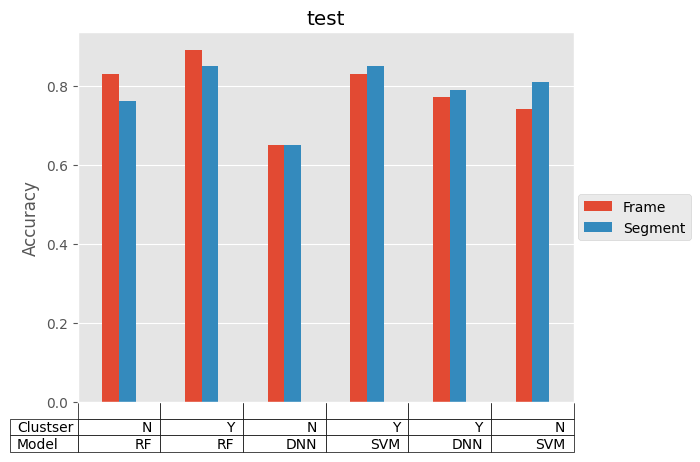

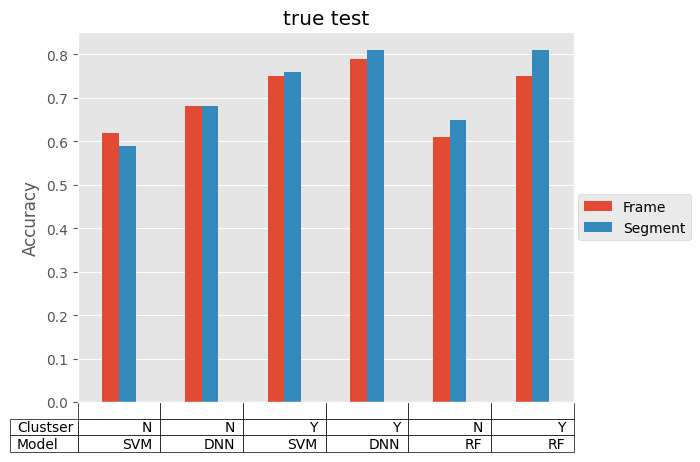

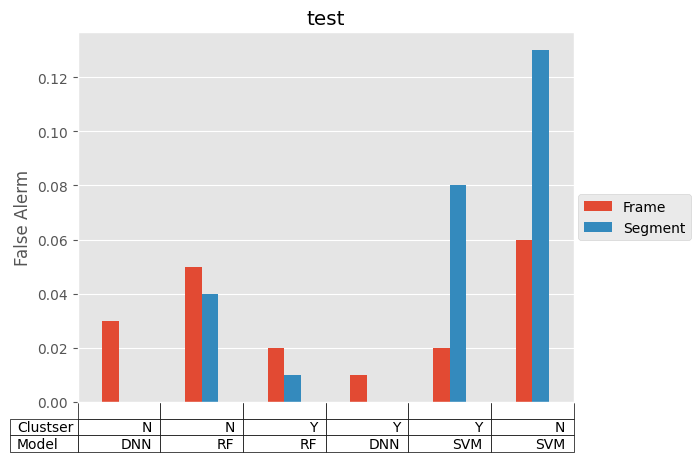

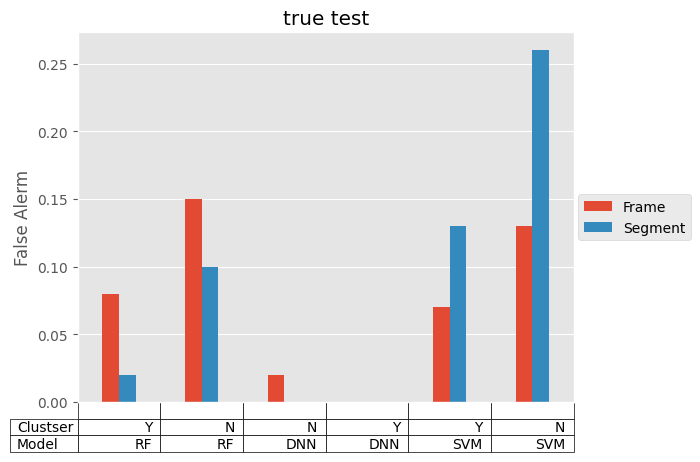

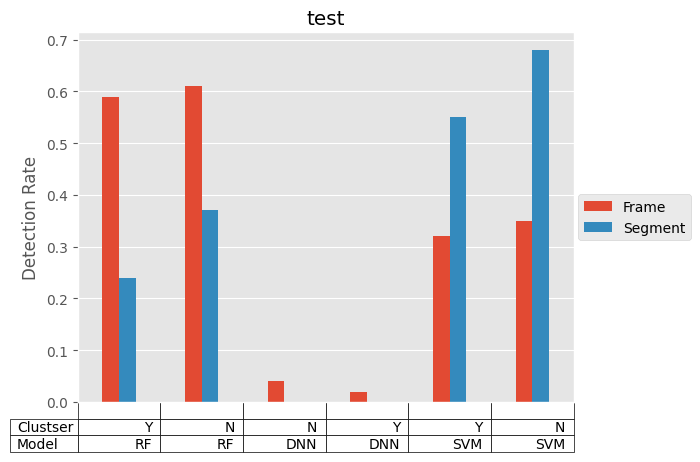

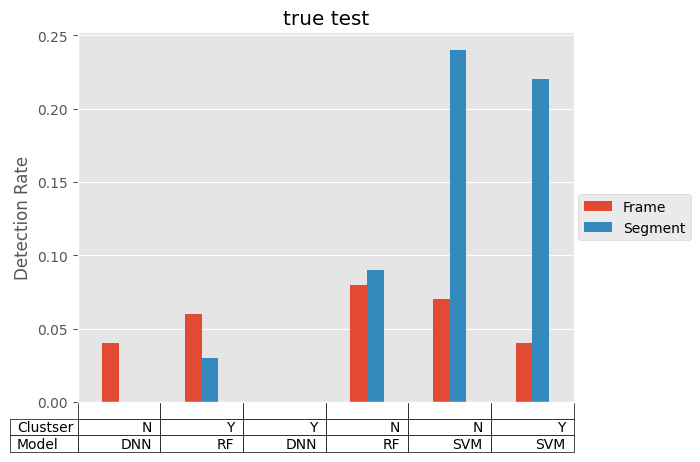

In [26]:
# compare
compare = 1 # segment or frame
# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['tracc','trfa','trdr'],['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['train','test','true test']
# select exp
compares = ['frame','bsF']
compares2 = [
    ['N','Y'],
    ['svm', 'rf', 'dnn', 'lstm']
]
legends = ['Frame', 'Segment']
cmp_titles = [
    'Clustser',
    'Model'
]
show_cmps = [
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]
title = 'BAR_FrameOrSeg_Compare'
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

nidx = [[],[]] # [frame idx, segment idx]
for j, cmp in enumerate(compares):
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            nidx[j].append(k)
#print(nidx)

for s in range(3):
    for i in range(1,3):
        dt = cols[i]
        y = np.array([df3.iloc[nidx[0]][dt[s]], df3.iloc[nidx[1]][dt[s]]])

        cl = len(y)
        fig = plt.figure()
        ax = fig.add_subplot(111)

        cell = [[],[]]
        cmps = []
        x=df3.iloc[nidx[0]]['model'].to_list()
        for k in range(len(x)):
            for r in range(2):
                for j, cmp in enumerate(compares2[r]):
                    if x[k].find(cmp)!=-1:
                        cell[r].append(show_cmps[r][j])
                        break
                    if j==len(compares2[r])-1:
                        cell[r].append('-')
        row_labels = cmp_titles.copy()
        
        # sort by max val
        y = np.array(y)
        cell = np.array(cell)
        idx = sorted(np.arange(len(y[0])), key = lambda s:(y[1]-y[0])[s])
        y = y[:,idx]
        cell = cell[:,idx]

        ax.title.set_text(subtitles[i])
        width = 0.1*cl
        x = np.arange(len(y[0]))
        spare_width = (1 - width)/cl

        for r in range(cl):
            ax.bar(x+r*width, y[r], width, label=legends[r])
        ax.set_xlim(-spare_width,len(x)-spare_width)
        plt.xticks([])
        plt.ylabel(axes[s])
        plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
        
        # plot table
        plt.table(cellText=cell,
                rowLabels=row_labels,
                colLabels=['']*len(y[0]),
                loc='bottom')
        
        plt.savefig(save_path+axes[s]+'_'+str(i+1)+'.png', bbox_inches="tight")

### graph 3

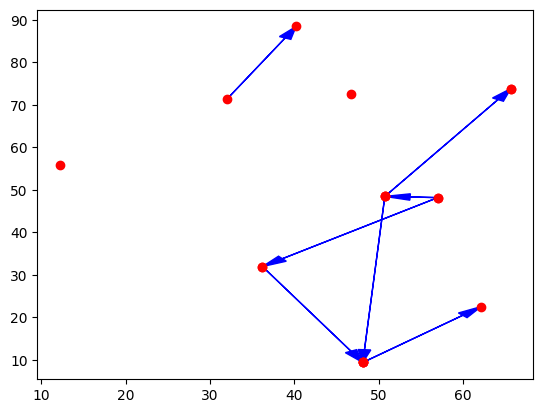

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

data = np.genfromtxt('file1.dat', delimiter=',', skip_header=1, names=['MAG', 'X0', 'Y0','X1','Y1'])
plt.scatter(data['X0'], data['Y0'], color='r', zorder=10)
plt.scatter(data['X1'], data['Y1'], color='r', zorder=10)

for d in data:
    if(d['MAG'] > 0):
        plt.arrow(d['X0'],d['Y0'],d['X1']-d['X0'], d['Y1']-d['Y0'], 
         shape='full', color='b', lw=1, length_includes_head=True, 
         zorder=0, head_length=3., head_width=1.5)

plt.show()

### Graph 4

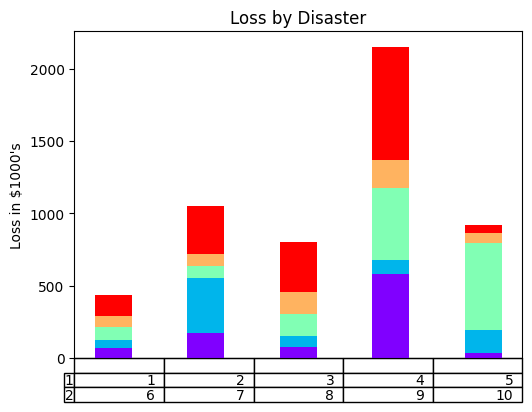

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = cm.rainbow(np.linspace(0, 1, len(rows))) #plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
cell_text = [[1,2,3,4,5],[6,7,8,9,10]]
plt.table(cellText=cell_text,
            rowLabels=[1,2],
            colLabels=['']*5,
            loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

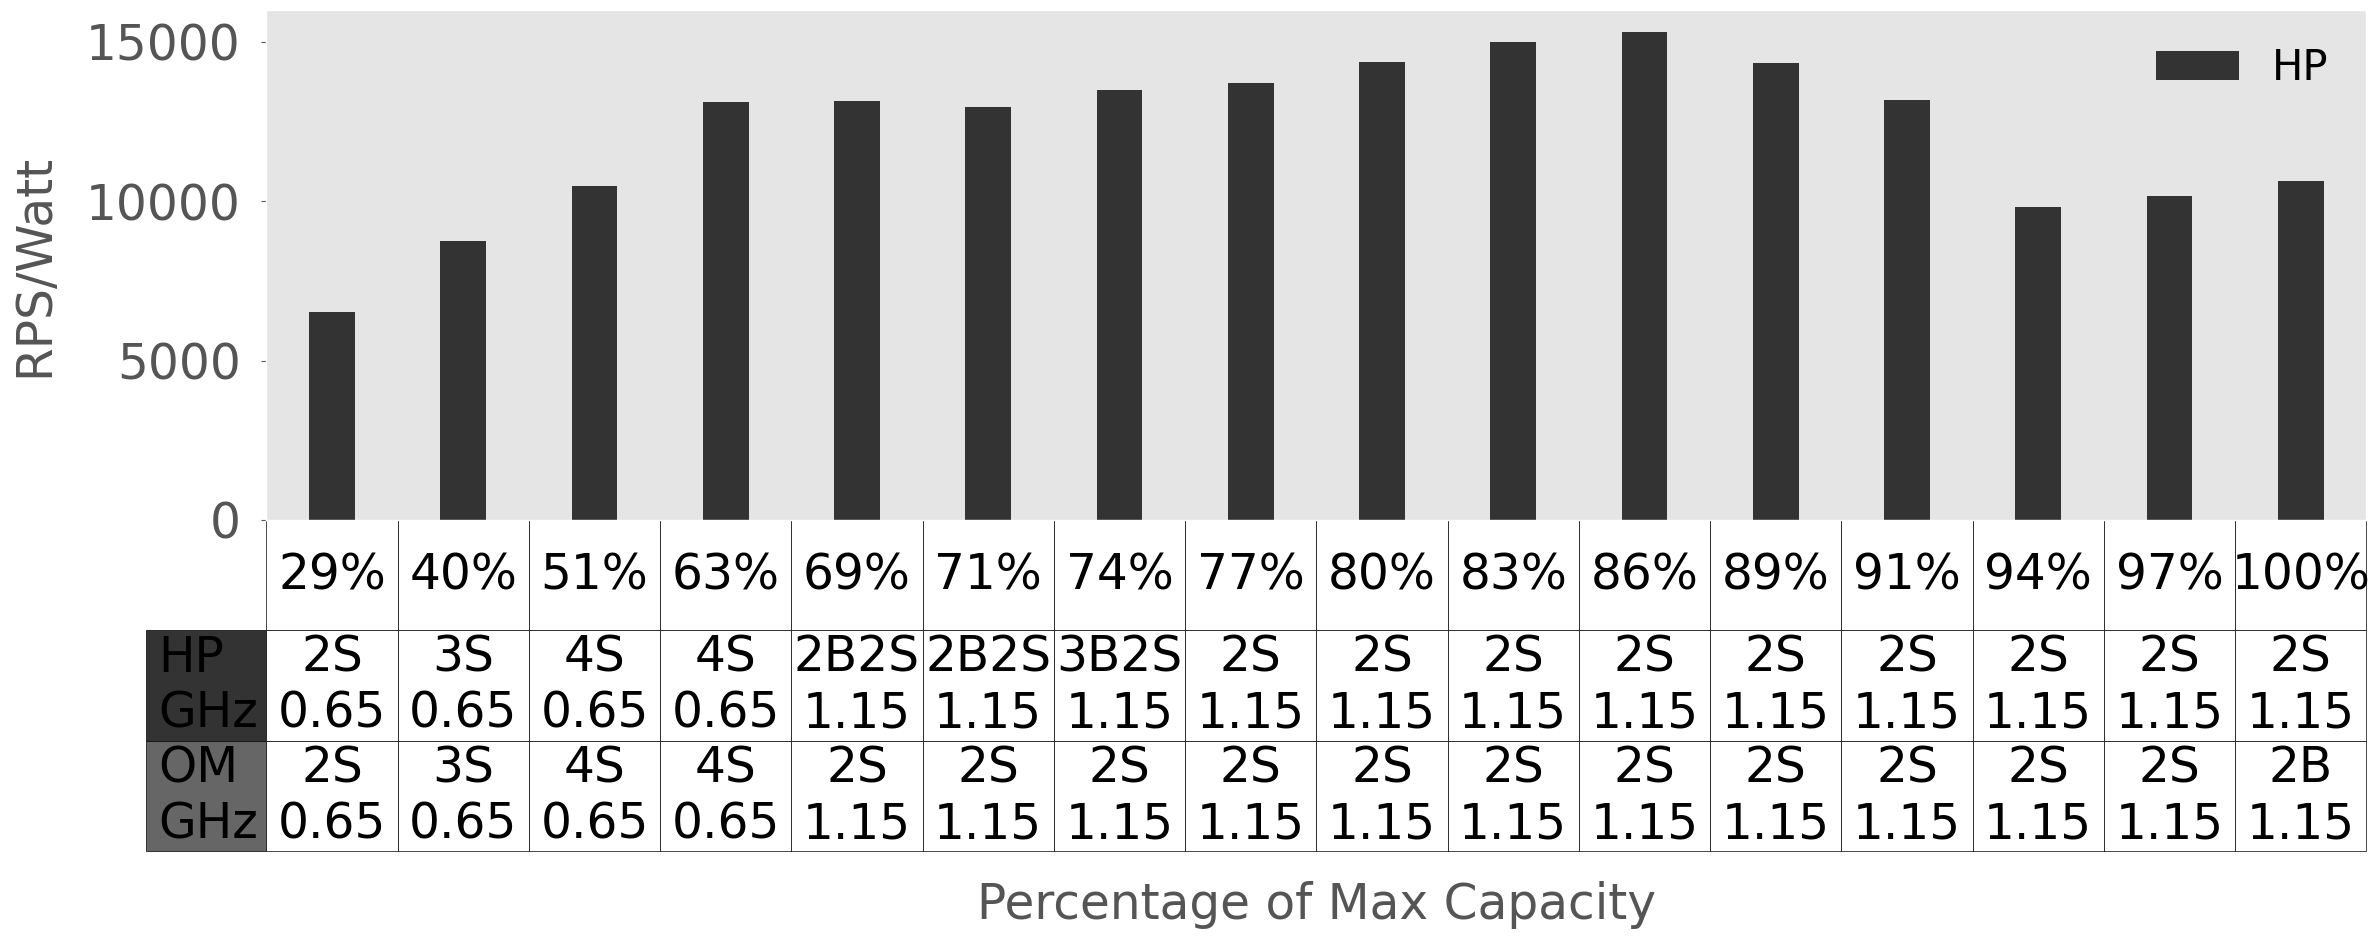

In [55]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import matplotlib

def plot_bar(dataset):
    matplotlib.rc('font', family='sans-serif')
    matplotlib.rc('font', serif='Helvetica Neue')
    matplotlib.rc('text', usetex='false')
    matplotlib.rcParams.update({'font.size': 30})
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(30.0,7.5)
    N = len(dataset[1])

    Load    = dataset[0]
    QoS     = dataset[1]
    Energy  = dataset[2]

    ind = np.arange(N)
    width = 0.35
    ind = np.arange(N)+width/2
    spare_width = (1 - width)/2

    plt.tick_params(axis='both', which='major', labelsize=35, pad=15)
    plt.tick_params(axis='y', which='minor', labelsize=35, pad=15)



    rects1 = ax.bar(ind, QoS, width,
                color='0.2',
                label='HP')

    # rects3 = ax.bar(ind+width, Energy, width,
    #             color='0.4',
    #             label='OM')

    lns = [rects1]#, rects3]
    labs = [l.get_label() for l in lns]

    ax.legend(lns, labs, ncol=2, fontsize=30,framealpha=0)

    ax.set_xlim(-spare_width,len(ind)-spare_width)
    ax.set_ylim(0, 16000)

    ax.set_ylabel('RPS/Watt', fontsize=35)
    ax.set_xlabel('Percentage of Max Capacity', fontsize=35)

    xTickMarks = dataset[0]
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=0, fontsize=40)
    plt.xticks([])
    ax.yaxis.grid()

    cell_text = [['2S\n0.65', '3S\n0.65', '4S\n0.65', '4S\n0.65', 
                  '2B2S\n1.15','2B2S\n1.15', '3B2S\n1.15', '2S\n1.15', 
                  '2S\n1.15', '2S\n1.15', '2S\n1.15','2S\n1.15', 
                  '2S\n1.15', '2S\n1.15', '2S\n1.15', '2S\n1.15'],
            ['2S\n0.65', '3S\n0.65', '4S\n0.65', '4S\n0.65',
             '2S\n1.15', '2S\n1.15', '2S\n1.15', '2S\n1.15', 
             '2S\n1.15', '2S\n1.15', '2S\n1.15', '2S\n1.15', 
             '2S\n1.15', '2S\n1.15', '2S\n1.15', '2B\n1.15']]
    colors=['0.2','0.4']
    rows = ['HP\nGHz','OM\nGHz']
    Loc='right'
    the_table = plt.table(cellText=cell_text,
                          rowLabels=rows,
                          colLabels=Load,
                          rowColours=colors,
                        cellLoc='center',
                          loc='bottom',
                          bbox=[0,-0.65,1,0.65])#x,y,w,h
    the_table.scale(1,2.5)

    the_table.auto_set_font_size(False)
    the_table.set_fontsize(35)
    plt.subplots_adjust(left=0.2, bottom=0.2)

    ax.xaxis.labelpad = 260

    ax.yaxis.labelpad = 20
    fig.savefig('rps-watt' +'.eps',format='eps',bbox_inches='tight', pad_inches=0.1, dpi=1000)

dataset = [['29%', '40%', '51%', '63%', '69%', '71%', '74%', '77%', '80%', '83%', '86%', '89%', '91%', '94%', '97%', '100%'], [6524.0, 8749.0, 10470.0, 13096.0, 13126.0, 12965.0, 13493.0, 13717.0, 14351.0, 14993.0, 15308.0, 14320.0, 13179.0, 9809.0, 10168.0, 10621.0], [6524.0, 8749.0, 10470.0, 13096.0, 6827.0, 5586.0, 7697.0, 8205.0, 8298.0, 8733.0, 8887.0, 9278.0, 9659.0, 9809.0, 10168.0, 10621.0]]
plot_bar(dataset)